# Лабораторная работа 1

Гуськова Кристина Игоревна, 6409-010302D

1. Классификация данных методом k ближайших соседей (kNN)
2. Классификация данных методом опорных векторов (SVM)
3. Построение softmax-классификатора

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [15]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from typing import Callable, Optional
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
warnings.filterwarnings('ignore')
np.random.seed(21)

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [16]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py' # определяем, где лежат данные CIFAR-10

# пытаемся удалить предыдущие данные, если они уже были загружены ранее
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir) # загружаем данные CIFAR-10

# выводим информацию о загруженных данных
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



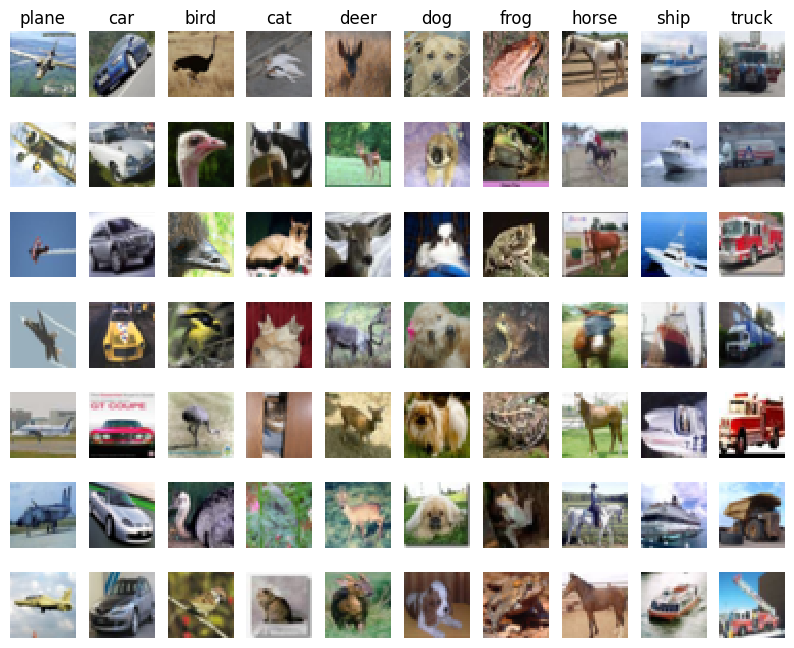

In [18]:
mapping_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # выписываем названия классов CIFAR-10
n_classes = len(mapping_labels) # количество всех классов
n_samples = 7 # количество образцов для каждого класса

# проходимся по всем классам и отображаем несколько случайных образцов
for class_index, class_name in enumerate(mapping_labels):
    class_indexes = np.random.choice(np.flatnonzero(y_train == class_index), n_samples, replace=False) # для каждого класса выбираем случайные 7 образцов
    for i, idx in enumerate(class_indexes): # проходимся по всем выбранным образцам
        plt_idx = i * n_classes + class_index + 1 # определяем индекс изображения в большой сетке из всех изображений
        plt.subplot(n_samples, n_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        # добавляем заголовок сверху каждой первой картинки класса, чтобы понимать, какой класс отображается в столбике
        if i == 0:
            plt.title(class_name)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [19]:
num_train = 5000 # определяем количество образцов для обучающего набора
train_mask = range(num_train) # определяем маску для выбора образцов из обучающего набора
# создаем обучающий набор для метода k-ближайших соседей
knn_X_train = X_train[train_mask]
knn_y_train = y_train[train_mask]

num_test = 500 # определяем количество образцов для тестового набора
test_mask = range(num_test) # определяем маску для выбора образцов из тестового набора
# создаем тестовый набор для метода k-ближайших соседей
knn_X_test = X_test[test_mask]
knn_y_test = y_test[test_mask]

In [20]:
# изменяем форму всех полученных наборов
knn_X_train = np.reshape(knn_X_train, (knn_X_train.shape[0], -1))
knn_y_train = np.reshape(knn_y_train, (knn_y_train.shape[0],))
knn_X_test = np.reshape(knn_X_test, (knn_X_test.shape[0], -1))
knn_y_test = np.reshape(knn_y_test, (knn_y_test.shape[0],))
print(knn_X_train.shape, knn_X_test.shape)

(5000, 3072) (500, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [21]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor() # cоздаем экземпляр классификатора k-ближайших соседей
classifier.train(knn_X_train, knn_y_train) # обучаем классификатор на обучающем наборе данных

1.5 Выполните классификацию на тестовой выборке

In [22]:
knn_dists_2 = classifier.compute_distances_two_loops(knn_X_test) # классификация на тестовой выборке с помощью одного из реализованных методов

In [23]:
knn_dists_1 = classifier.compute_distances_one_loop(knn_X_test) # классификация на тестовой выборке с помощью одного из реализованных методов

In [24]:
knn_dists_0 = classifier.compute_distances_no_loops(knn_X_test) # классификация на тестовой выборке с помощью одного из реализованных методов

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


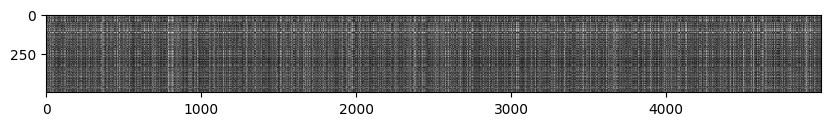

In [25]:
# визуализируем матрицу расстояний с помощью imshow, где цвет каждой ячейки соответствует значению расстояния между соответствующими парами точек тестового и обучающего наборов
plt.imshow(knn_dists_2, interpolation='none')
plt.show()

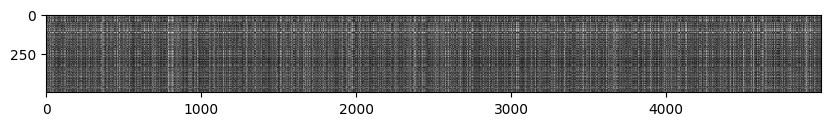

In [26]:
# визуализируем матрицу расстояний с помощью imshow, где цвет каждой ячейки соответствует значению расстояния между соответствующими парами точек тестового и обучающего наборов
plt.imshow(knn_dists_1, interpolation='none')
plt.show()

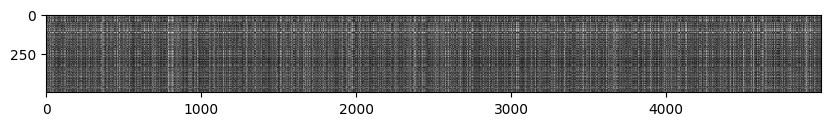

In [27]:
# визуализируем матрицу расстояний с помощью imshow, где цвет каждой ячейки соответствует значению расстояния между соответствующими парами точек тестового и обучающего наборов
plt.imshow(knn_dists_0, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [28]:
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(y_pred == y_true) / np.sum(y_true.shape) # вовзращаем точность как долю правильно классифицированных объектов от общего числа объектов

In [29]:
knn_y_test_predicts_2 = classifier.predict_labels(knn_dists_2) # предсказываем метки по найденным расстояниям с помощью одного из реализованных методов
print(f"Accuracy two loops: {accuracy(knn_y_test_predicts_2, knn_y_test)}")
knn_y_test_predicts_1 = classifier.predict_labels(knn_dists_1) # предсказываем метки по найденным расстояниям с помощью одного из реализованных методов
print(f"Accuracy one loop: {accuracy(knn_y_test_predicts_1, knn_y_test)}")
knn_y_test_predicts_0 = classifier.predict_labels(knn_dists_0) # предсказываем метки по найденным расстояниям с помощью одного из реализованных методов
print(f"Accuracy no loops: {accuracy(knn_y_test_predicts_0, knn_y_test)}")

Accuracy two loops: 0.274
Accuracy one loop: 0.274
Accuracy no loops: 0.274


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [30]:
k_list = range(1, 21) # задаем диапазон возможных значений k - количества ближайших соседей, которые будет использовать алгоритм
accuracy_list = []

# проходимся по всем возможным соседям и для каждого значения количества соседей вычисляем точность работы алгоритма
for k in k_list:
    y_preds = classifier.predict(knn_X_test, k=k, num_loops=2) # предсказываем метки с помощью одного из реализованных методов
    accuracy_list.append(accuracy(y_preds, knn_y_test)) # находим точность для предсказанных меток и добавляем в массив точностей

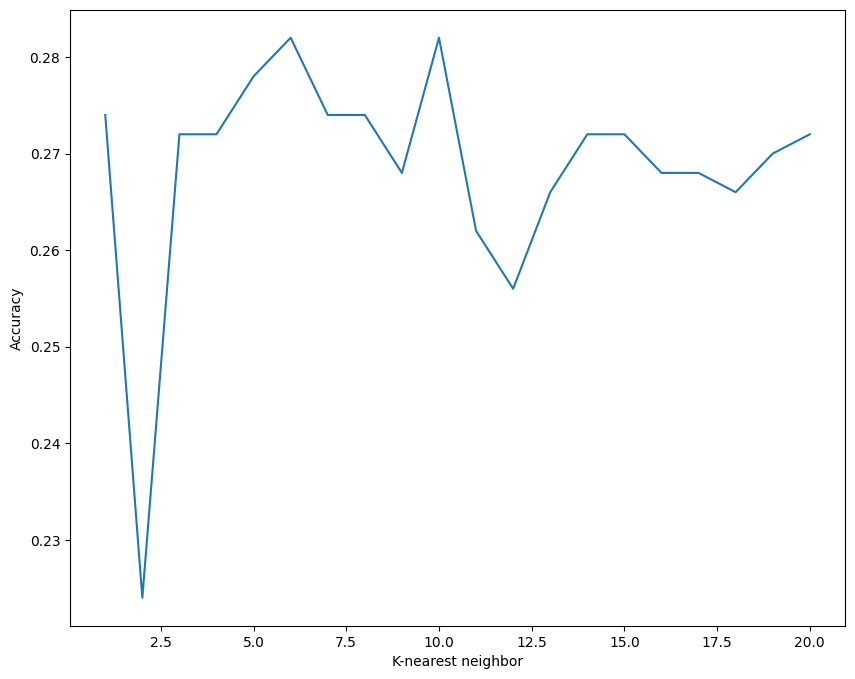

In [31]:
# построение графика зависимости точности от количества соседей, с помощью которых производилась классификация
plt.plot(k_list, accuracy_list)
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [32]:
k_choices = [1, 2, 3, 4, 5, 10, 20, 50, 75, 100] # задаем список значений k - количества ближайших соседей, которые будет использовать алгоритм
print(f"Выборка соседей: {k_choices}")

Выборка соседей: [1, 2, 3, 4, 5, 10, 20, 50, 75, 100]


In [33]:
def cross_val_score(
        estimator,
        X: np.ndarray,
        y: np.ndarray,
        k_folds: int = 5,
        scoring: Optional[Callable[[np.ndarray, np.ndarray], float]] = accuracy,
        estimator_params: Optional[dict] = None,
        train_estimator_params: Optional[dict] = None,
        prediction_estimator_params: Optional[dict] = None,
        verbose: int = 1,
) -> np.ndarray:
    
    # разбиваем массивы меток и признаков на несколько фолдов
    y_folds = np.array_split(y, k_folds)
    X_folds = np.array_split(X, k_folds)
    
    accuracies = np.zeros((len(y_folds),))

    # выводим более подробную информацию о кросс-валидации
    if verbose > 1:
        print(40 * "=")
        print(f"Cross validation for {estimator.__name__}")
        print(40 * "=")

    # проходимся по каждому фолду
    for fold in range(len(y_folds)):
        if verbose > 1:
            print(40 * "=")
            print(f"Fold: {fold}")

        # выбираем часть данных как тренировочные, а часть как тестовые
        y_train_fold = y_folds
        X_train_fold = X_folds

        y_test_fold = y_train_fold[fold]
        X_test_fold = X_train_fold[fold]

        X_train_elements = []
        y_train_elements = []
        
        # записываем данные всех фолдов в тренировочные данные, если текущий фолд не является фолдом для тестирования
        for i, element in enumerate(zip(X_folds, y_folds)):
            if i != fold:
                X_train_elements.append(element[0])
                y_train_elements.append(element[1])

        # объединяем данные из всех тренировочных фолдов в один массив
        y_train_fold = np.hstack(y_train_elements)
        X_train_fold = np.vstack(X_train_elements)

        # создаем экземпляр оцениваемой модели 
        if estimator_params:
            estimator_ = estimator(**estimator_params)
        else:
            estimator_ = estimator()
        
        # обучаем полученную модель на тренировочных данных
        if train_estimator_params:
            estimator_.train(X_train_fold, y_train_fold, **train_estimator_params)
        else:
            estimator_.train(X_train_fold, y_train_fold)

        # предсказываем значения для тестовых данных
        if prediction_estimator_params:
            fold_y_pred = estimator_.predict(X_test_fold, **prediction_estimator_params)
        else:
            fold_y_pred = estimator_.predict(X_test_fold)

        if verbose > 1:
            print(f"Score: {scoring(y_test_fold, fold_y_pred)}")
            print(40 * "=")
            
        accuracies[fold] = scoring(y_test_fold, fold_y_pred) # записываем оценку качества модели на текущем фолде в массив точностей

    return accuracies

In [34]:
cross_val_results = []
# для каждого значения количества соседей выполняем кросс-валидацию
for i, k in enumerate(k_choices):
    print(f"Element {i + 1} from {len(k_choices)} - {round((i + 1) / len(k_choices), 2) * 100}%")
    cross_val_scores = cross_val_score(KNearestNeighbor, knn_X_train, knn_y_train, prediction_estimator_params=dict(k=k))
    # сохраняем в словарь результаты кросс-валидации для текущего значения количества соседей
    cross_val_results.append({
        "k": k,
        "cross_val_scores": cross_val_scores,
    })

Element 1 from 10 - 10.0%
Element 2 from 10 - 20.0%
Element 3 from 10 - 30.0%
Element 4 from 10 - 40.0%
Element 5 from 10 - 50.0%
Element 6 from 10 - 60.0%
Element 7 from 10 - 70.0%
Element 8 from 10 - 80.0%
Element 9 from 10 - 90.0%
Element 10 from 10 - 100.0%


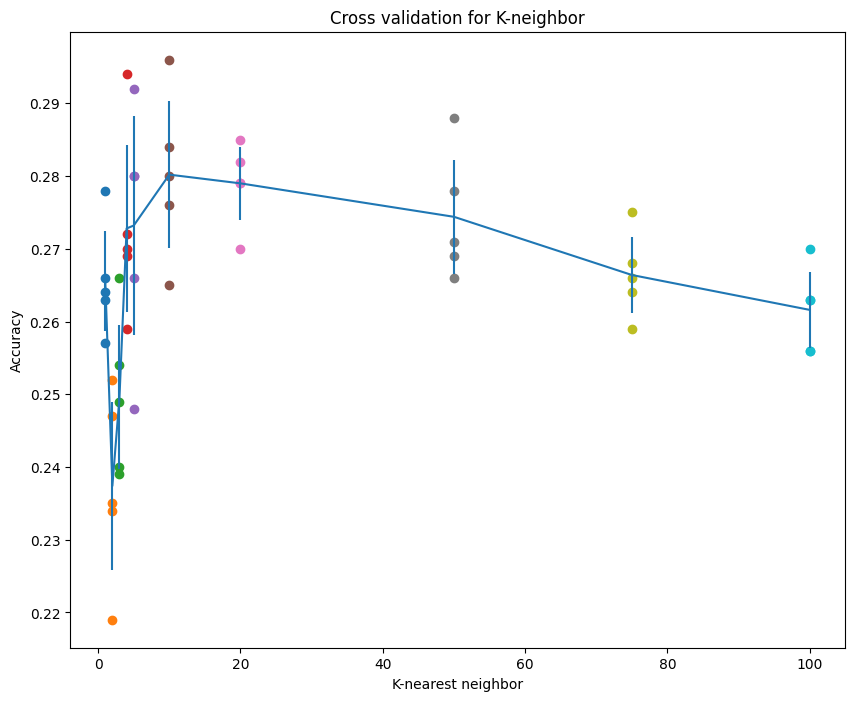

In [36]:
acc_mean = []
acc_std = []

for res in cross_val_results:
    # получаем значение количества соседей и точность при таком значении k
    k = res["k"]
    acc = res["cross_val_scores"]
    # вычисляем среднее значение и ско для точности при заданном k
    acc_mean.append(np.mean(acc))
    acc_std.append(np.std(acc))

    plt.scatter([k] * len(acc), acc) # разбрасываем точки по горизонтальной оси в зависимости от значения k, чтобы увидеть, как меняется точность для каждого k

# строим график средних значений точности для каждого значения k с использованием ошибок стандартного отклонения
plt.errorbar(k_choices, acc_mean, yerr=acc_std)
plt.title("Cross validation for K-neighbor")
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()

In [37]:
cross_val_df = pd.DataFrame(data=cross_val_results) # создаем dataframe из результатов кросс-валидации
cross_val_df.head() # выводим первые несколько строк

,k,cross_val_scores
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]"
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]"
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]"
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]"
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]"


In [38]:
cross_val_df["mean"] = cross_val_df["cross_val_scores"].apply(lambda x: np.mean(x)) # вычисляем среднее значение для каждого списка оценок качества модели и добавляем его в новый столбец "mean"
cross_val_df["std"] = cross_val_df["cross_val_scores"].apply(lambda x: np.std(x)) # вычисляем стандартное отклонение для каждого списка оценок качества модели и добавляем его в новый столбец "std"
cross_val_df

,k,cross_val_scores,mean,std
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]",0.2656,0.006888
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]",0.2374,0.011500
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]",0.2496,0.009932
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]",0.2728,0.011513
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]",0.2732,0.015052
5,10,"[0.265, 0.296, 0.276, 0.284, 0.28]",0.2802,0.010127
6,20,"[0.27, 0.279, 0.279, 0.282, 0.285]",0.2790,0.005020
7,50,"[0.271, 0.288, 0.278, 0.269, 0.266]",0.2744,0.007864
8,75,"[0.264, 0.275, 0.259, 0.266, 0.268]",0.2664,0.005238
9,100,"[0.256, 0.27, 0.263, 0.256, 0.263]",0.2616,0.005238


In [39]:

cross_val_df.sort_values(by="mean").sort_values(by="std", ascending=False) # сортируем dataframe сначала по значениям столбца "mean" в порядке возрастания, затем сортируем отсортированный dataframe по значениям столбца "std" в порядке убывания

,k,cross_val_scores,mean,std
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]",0.2732,0.015052
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]",0.2728,0.011513
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]",0.2374,0.011500
5,10,"[0.265, 0.296, 0.276, 0.284, 0.28]",0.2802,0.010127
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]",0.2496,0.009932
7,50,"[0.271, 0.288, 0.278, 0.269, 0.266]",0.2744,0.007864
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]",0.2656,0.006888
9,100,"[0.256, 0.27, 0.263, 0.256, 0.263]",0.2616,0.005238
8,75,"[0.264, 0.275, 0.259, 0.266, 0.268]",0.2664,0.005238
6,20,"[0.27, 0.279, 0.279, 0.282, 0.285]",0.2790,0.005020


In [40]:
best_k = 5 # результаты показали, что наилучший результат достигается при количестве соседей равном 5


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [41]:
best_knn = KNearestNeighbor()
best_knn.train(knn_X_train, knn_y_train) # обучаем модель на тренировочных данных
# вычисляем и выводим точность предсказаний для разных значений параметра num_loops
print(f"Num loops: {0}, accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=0))}")
print(f"Num loops: {1}, accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=1))}")
print(f"Num loops: {2}, accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=2))}")

Num loops: 0, accuracy = 0.278
Num loops: 1, accuracy = 0.278
Num loops: 2, accuracy = 0.278


1.11 Сделайте выводы по результатам 1 части задания.

1. Очень важно оптимально подобрать количество соседей, так как при малом k у модели недостаточно данных для обучения и в результате получается низкая точность, а при слишком большом значении k может произойти переобучение, и точность тоже понизится.
2. В силу большого объема обучающих и тестовых данных вычисление точности модели с помощью двух циклов занимает очень много времени, так что при большом количестве данных оптимальнее применять подсчет расстояния без использования циклов, так как все варианты с различным количеством циклов дают одинаковые результаты.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [15]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [42]:
# определяем размеры различных наборов данных
num_train = 49000
num_val = 1000
num_test = 1000
num_dev = 500

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir) # загружаем данные CIFAR-10

# выбираем данные для наборов обучения, валидации, тестирования и разработки
mask = range(num_train, num_train + num_val)
softmax_X_val = X_train[mask]
softmax_y_val = y_train[mask]

mask = range(num_train)
softmax_X_train = X_train[mask]
softmax_y_train = y_train[mask]

mask = np.random.choice(num_train, num_dev, replace=False)
softmax_X_dev = X_train[mask]
softmax_y_dev = y_train[mask]

mask = range(num_test)
softmax_X_test = X_test[mask]
softmax_y_test = y_test[mask]

# выполняем решейпинг данных для удобства использования в классификаторе
softmax_X_train = np.reshape(softmax_X_train, (softmax_X_train.shape[0], -1))
softmax_y_train = np.reshape(softmax_y_train, (softmax_y_train.shape[0],))

softmax_X_val = np.reshape(softmax_X_val, (softmax_X_val.shape[0], -1))
softmax_y_val = np.reshape(softmax_y_val, (softmax_y_val.shape[0],))

softmax_X_test = np.reshape(softmax_X_test, (softmax_X_test.shape[0], -1))
softmax_y_test = np.reshape(softmax_y_test, (softmax_y_test.shape[0],))

softmax_X_dev = np.reshape(softmax_X_dev, (softmax_X_dev.shape[0], -1))
softmax_y_dev = np.reshape(softmax_y_dev, (softmax_y_dev.shape[0],))

# выводим размеры каждого из наборов данных
print(f"Тренировочная выборка: X={softmax_X_train.shape}, y={softmax_y_train.shape}")
print(f"Валидационная выборка: X={softmax_X_val.shape}, y={softmax_y_val.shape}")
print(f"Тестовая выборка: X={softmax_X_test.shape}, y={softmax_y_test.shape}")
print(f"Выборка для разработки: X={softmax_X_dev.shape}, y={softmax_y_dev.shape}")

Тренировочная выборка: X=(49000, 3072), y=(49000,)
Валидационная выборка: X=(1000, 3072), y=(1000,)
Тестовая выборка: X=(1000, 3072), y=(1000,)
Выборка для разработки: X=(500, 3072), y=(500,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


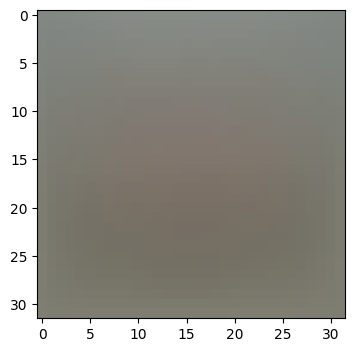

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [43]:
mean_image = np.mean(softmax_X_train, axis=0) # вычисляем среднее изображение по всем изображениям в наборе обучающих данных
print(mean_image[:10])

# отображаем полученное среднее изображение
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

# центрируем данные путем вычитания среднего изображения из каждого изображения
softmax_X_train -= mean_image
softmax_X_val -= mean_image
softmax_X_test -= mean_image
softmax_X_dev -= mean_image

# добавляем смещение, т.е. дополнительный столбец из единиц, к каждому набору данных
softmax_X_train = np.hstack([softmax_X_train, np.ones((softmax_X_train.shape[0], 1))])
softmax_X_val = np.hstack([softmax_X_val, np.ones((softmax_X_val.shape[0], 1))])
softmax_X_test = np.hstack([softmax_X_test, np.ones((softmax_X_test.shape[0], 1))])
softmax_X_dev = np.hstack([softmax_X_dev, np.ones((softmax_X_dev.shape[0], 1))])

# выводим размеры каждого набора данных после центрирования и добавления смещения
print(softmax_X_train.shape, softmax_X_val.shape, softmax_X_test.shape, softmax_X_dev.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [44]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.368651
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [45]:
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0) # вызываем функцию softmax_loss_naive для вычисления потерь и градиента

from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10) # выполняем численную проверку градиента с помощью grad_check_sparse

loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 5e1) # вызываем функцию softmax_loss_naive с регуляризацией
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10) # выполняем численную проверку градиента с регуляризацией

numerical: -3.719727 analytic: -3.719728, relative error: 1.189834e-08
numerical: -2.553204 analytic: -2.553204, relative error: 2.326346e-08
numerical: -0.730362 analytic: -0.730362, relative error: 3.548534e-08
numerical: -1.643162 analytic: -1.643162, relative error: 3.064630e-11
numerical: 0.113365 analytic: 0.113365, relative error: 9.176340e-07
numerical: -0.651587 analytic: -0.651587, relative error: 8.113924e-08
numerical: 1.680393 analytic: 1.680393, relative error: 9.948773e-09
numerical: 1.354312 analytic: 1.354312, relative error: 2.361461e-08
numerical: 2.032967 analytic: 2.032967, relative error: 1.545660e-08
numerical: 4.597173 analytic: 4.597173, relative error: 1.259589e-08
numerical: 0.629401 analytic: 0.629401, relative error: 5.531786e-08
numerical: -3.147083 analytic: -3.147083, relative error: 1.076511e-10
numerical: 1.002358 analytic: 1.002358, relative error: 3.581058e-08
numerical: -0.845975 analytic: -0.845975, relative error: 6.952200e-09
numerical: 5.077072 

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [46]:
# засекаем время перед вычислением потерь и градиента с помощью naive softmax
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
# засекаем время перед вычислением потерь и градиента с помощью векторизованной softmax
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# вычисляем разницу в потерях и градиентах между naive и векторизованной реализациями softmax
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.368651e+00 computed in 0.279324s
vectorized loss: 2.368651e+00 computed in 0.015776s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [47]:
from scripts.classifiers.linear_classifier import Softmax

softmax_classifier = Softmax() # создание экземпляра класса Softmax
softmax_classifier.train(softmax_X_train, softmax_y_train) # обучаем классификатор на тренировочных данных
print(f"Accuracy: {accuracy(softmax_y_test, softmax_classifier.predict(softmax_X_test))}") # выводим точность классификации на тестовых данных

Accuracy: 0.103


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [48]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_val = -1

# проходимся по всем значениям learning_rates и regularization_strengths
for lr in learning_rates:
    for reg in regularization_strengths:
        softmax = Softmax() # создаем экземпляр класса Softmax
        softmax.train(softmax_X_train, softmax_y_train, lr, reg, num_iters=2000, verbose=False) # обучаем классификатор на тренировочных данных с текущими значениями lr и reg
        # предсказываем метки для тренировочного и валидационного наборов
        y_train_pred = softmax.predict(softmax_X_train)
        y_val_pred = softmax.predict(softmax_X_val)
        # вычисляем точности на тренировочном и валидационном наборах
        training_accuracies = np.mean(softmax_y_train == y_train_pred)
        validation_accuracies = np.mean(softmax_y_val == y_val_pred)
        results[(lr, reg)] = (training_accuracies, validation_accuracies)
        # обновление лучшей точности на валидационном наборе и соответствующих lr и reg
        if validation_accuracies > best_val:
            best_val = validation_accuracies

In [49]:
# выводим полученные результаты
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('Коэффициент скорости обучения: %e Параметр регуляризации: %e Точность на обучающих данных: %f Точность на валидационных данных: %f' % (lr, reg, train_accuracy, val_accuracy))

Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.353102 Точность на валидационных данных: 0.368000
Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.330204 Точность на валидационных данных: 0.347000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.144204 Точность на валидационных данных: 0.139000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.100265 Точность на валидационных данных: 0.087000


In [50]:
print('Лучшая точность при перекрестной валидации: %f' % best_val) # выводим информацию о лучшей точности при перекрестной валидации

Лучшая точность при перекрестной валидации: 0.368000


3.10 Сделайте выводы по третьей части задания

1. В зависимости от подобранных параметров точность Softmax различается.
2. При сравнении скорости работы softmax_loss_naive и softmax_loss_vectorized, быстрее показал себя softmax_loss_vectorized, а разницы в результатах двух реализаций не оказалось, что подтверждает правильность векторизации.
3. При обучении модели лучшая точность равна 0.353 на обучающей выборке при коэффициенте скорости обучения: 1.000000e-07 параметре регуляризации: 2.500000e+04, а лучшая точность при перекрестной валидации оказалась равна 0.368.